In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

import models as M
from train import load_data

2023-11-19 01:02:36.106363: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-19 01:02:36.185072: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-19 01:02:37.452918: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Using TensorFlow backend
tf INFO messages are suppressed.
sklearn version: 1.3.1


# Outbound Traffic

In [2]:
_,_,_,_,x_test,y_test = load_data('outbound')


======== loadiing train and test data ==========
load x_train
load y_train
load x_test
load x_test
load x_val
load y_val
...load complete.
imported training data:
x_train shape: (12220423, 246)
y_train shape: (12220423,)
[(0.0, 11968256), (1.0, 252167)]
imported validation data:
x_val shape: (1359116, 246)
y_val shape: (1359116,)
[(0.0, 1330995), (1.0, 28121)]
imported test data:
x_test shape: (3585960, 246)
y_test shape: (3585960,)
[(0.0, 3496912), (1.0, 89048)]


# CD Predictions

In [3]:
#cd_path = '/smallwork/alexander.huang/concrete_dropout/outbound/49114892/predictions.npy'
cd_path = '/smallwork/alexander.huang/mcdropout/outbound/49595416/mcd_predictions.npy'
cd_pred = np.load(cd_path)
print(cd_pred.shape)

(20, 3585960, 2)


In [4]:
def plot_sample(sample, y_pred, thresh=0.5):
    labels = ['allowed', 'blocked']
    select = y_pred[:,sample,:]
    mean = np.mean(select, axis=0)
    std = np.std(select, axis=0)
    preds = np.mean(select, axis=0)
    prediction = np.where(preds[1] > thresh, 1, 0)
    cls = labels[prediction]
    
    fig, ax=plt.subplots(figsize=(3,5))
    for i in range(0,20):
        ax.scatter(0, select[i,0], alpha=0.2, c='b')
        ax.scatter(1, select[i,1], alpha=0.2, c='b')
        ax.scatter(0, mean[0], alpha=0.2, c='r', marker='.')
        ax.scatter(1, mean[1], alpha=0.2, c='r', marker='.')
        '''
        ax.scatter(0, mean[0]+std[0], alpha=0.2, c='g', marker='.')
        ax.scatter(1, mean[1]+std[1], alpha=0.2, c='g', marker='.')
        ax.scatter(0, mean[0]-std[0], alpha=0.2, c='g', marker='.')
        ax.scatter(1, mean[1]-std[1], alpha=0.2, c='g', marker='.')
        '''
        ax.scatter(0, mean[0]+2*std[0], alpha=0.2, c='g', marker='_')
        ax.scatter(1, mean[1]+2*std[1], alpha=0.2, c='g', marker='_')
        ax.scatter(0, mean[0]-2*std[0], alpha=0.2, c='g', marker='_')
        ax.scatter(1, mean[1]-2*std[1], alpha=0.2, c='g', marker='_')
        
    plt.axhline(y=thresh, color='black', linestyle='dotted', label='hi') 
    plt.xticks(range(0,2), labels=labels, rotation=45)
    plt.xlim([-1, 2])
    plt.ylim([0,1])
    plt.xlabel('class')
    plt.ylabel('p(class)')
    plt.legend(handles=[Line2D([0], [0], marker='.', color='w', label='mean prediction', markerfacecolor='r'),
                        Line2D([0], [0], marker='_', color='g', label='mean±2stddev', markerfacecolor='g'),
                        Line2D([0], [0], linestyle='dotted', color='black', label='threshold', markerfacecolor='r')
                       ]
              )
    plt.title(f'Sample: {sample}, Prediction: {cls}')
    plt.show()

In [5]:
print(np.argwhere(y_test[5000:6000]==1))

[[  1]
 [ 31]
 [ 42]
 [ 63]
 [101]
 [308]
 [314]
 [340]
 [431]
 [439]
 [451]
 [474]
 [477]
 [506]
 [523]
 [543]
 [583]
 [584]
 [634]
 [746]
 [747]
 [828]
 [832]
 [857]
 [879]
 [947]
 [955]]


21


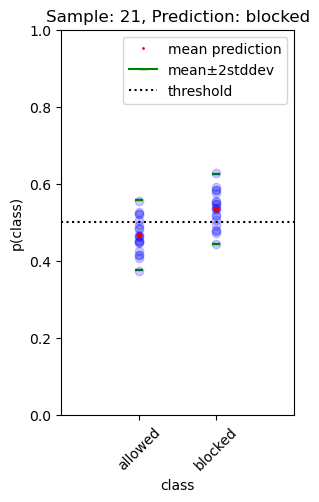

label: 1.0


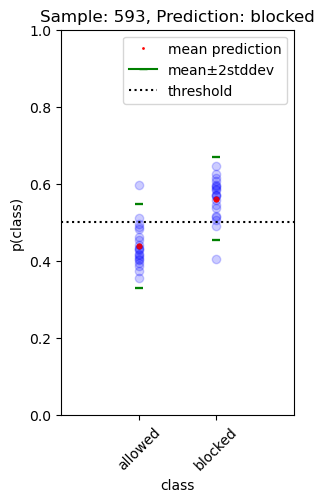

label: 0.0


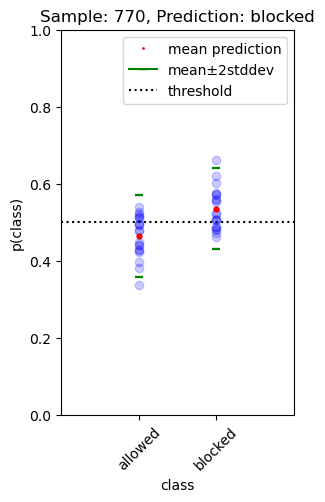

label: 0.0


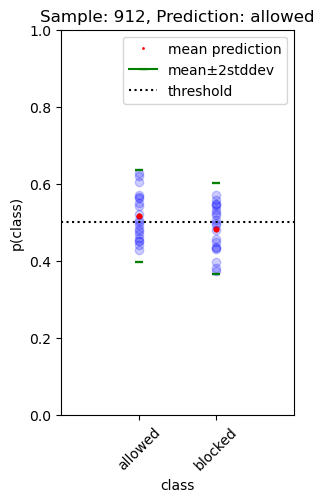

label: 0.0


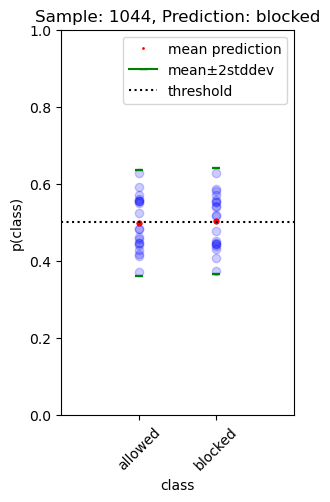

label: 0.0


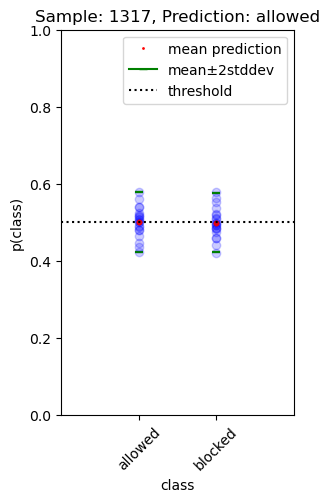

label: 0.0


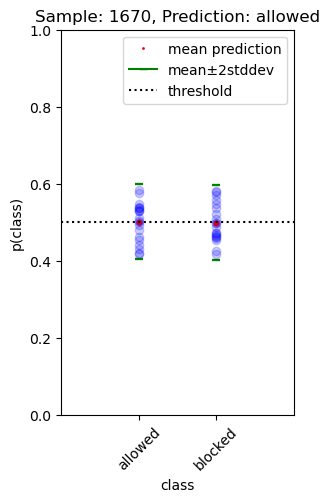

label: 0.0


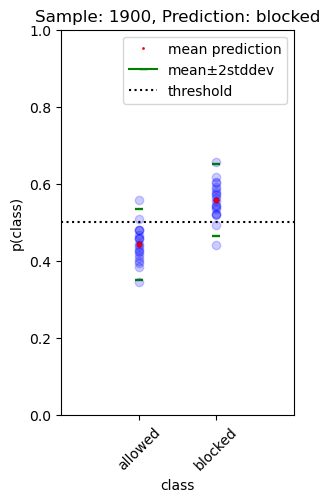

label: 0.0


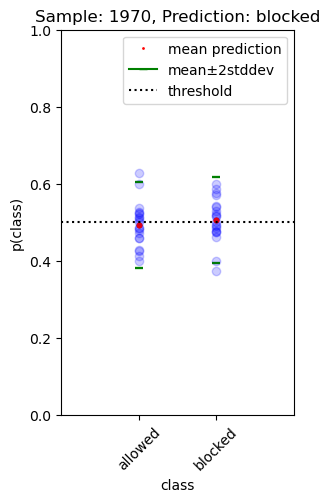

label: 0.0


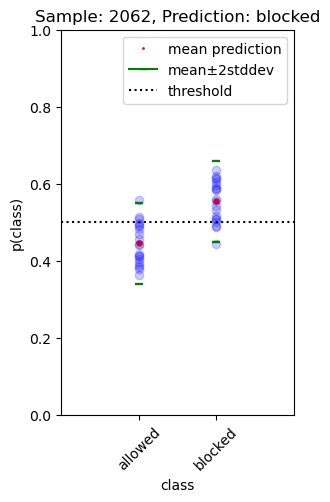

label: 0.0


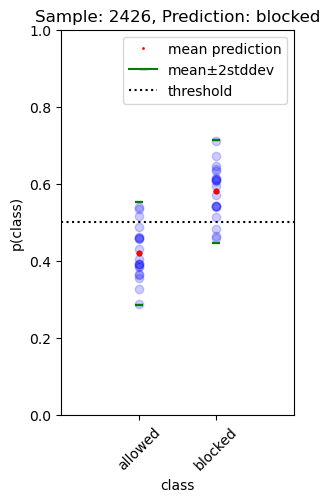

label: 0.0


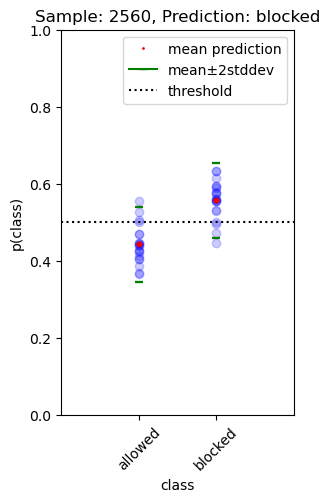

label: 0.0


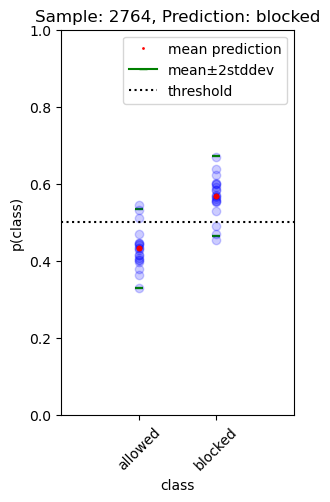

label: 0.0


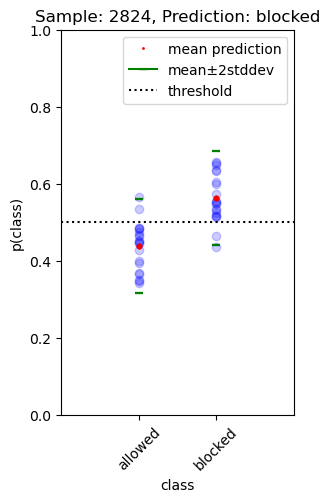

label: 0.0


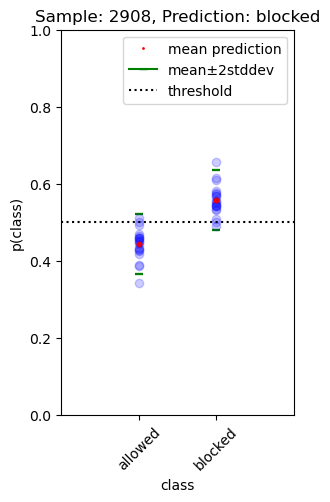

label: 0.0


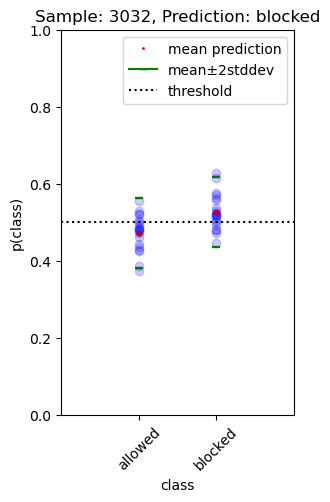

label: 0.0


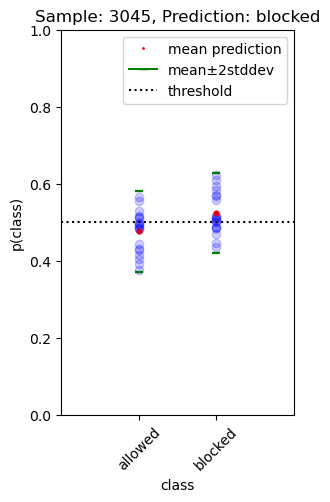

label: 0.0


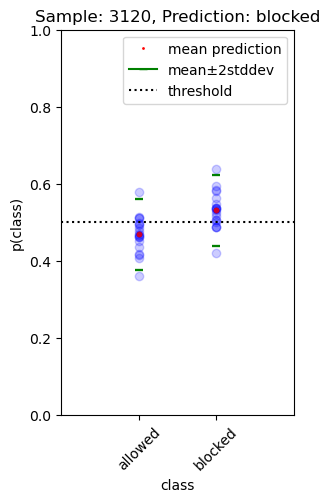

label: 0.0


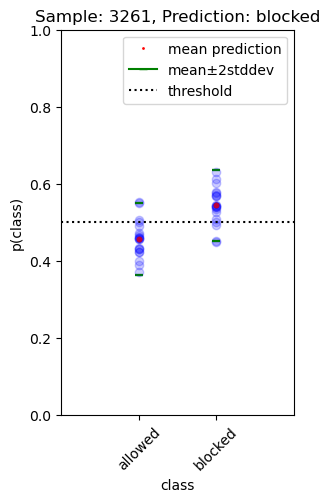

label: 0.0


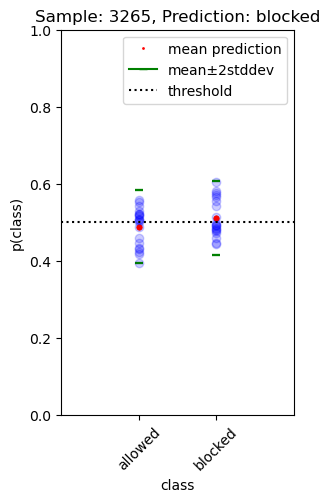

label: 0.0


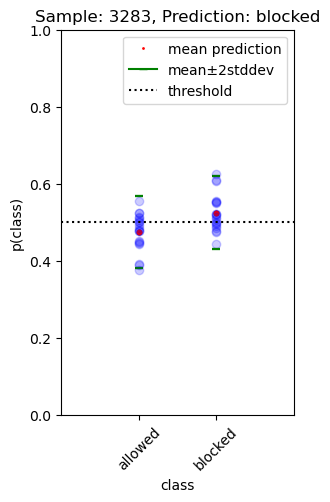

label: 0.0


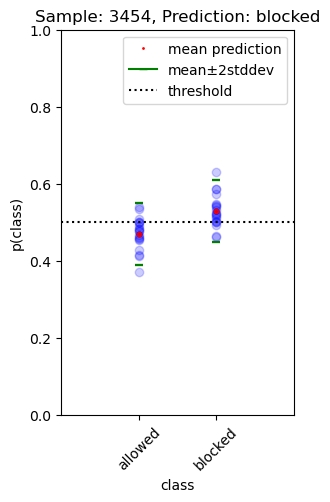

label: 0.0


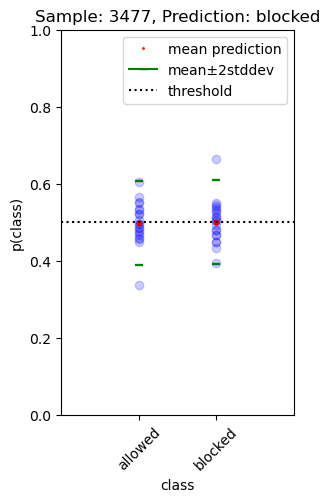

label: 0.0


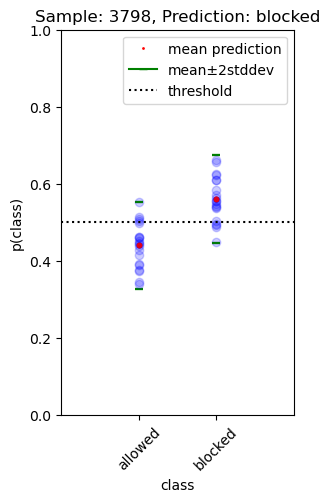

label: 0.0


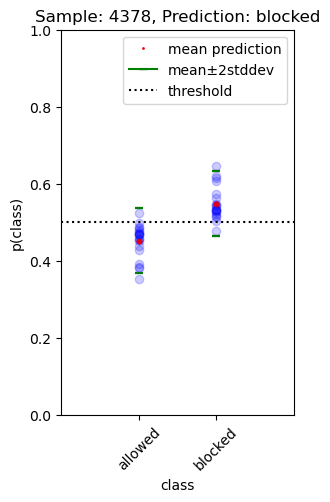

label: 0.0


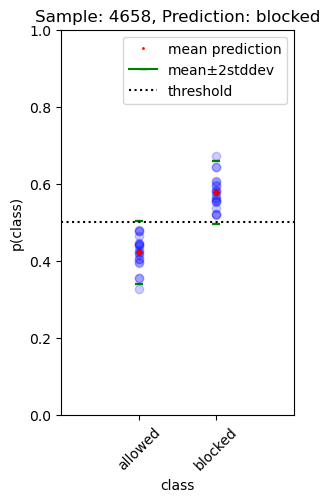

label: 0.0


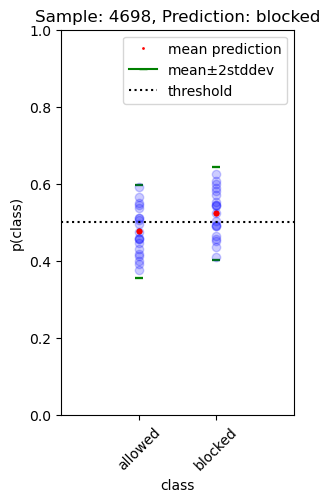

label: 0.0


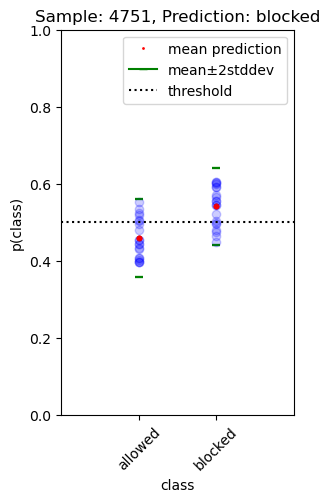

label: 0.0


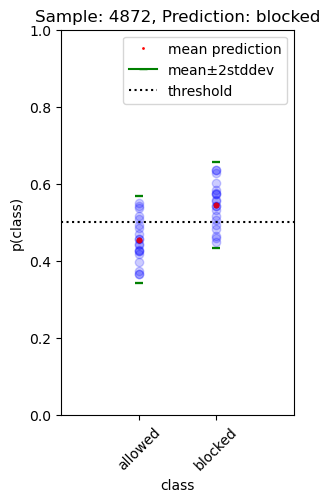

label: 0.0


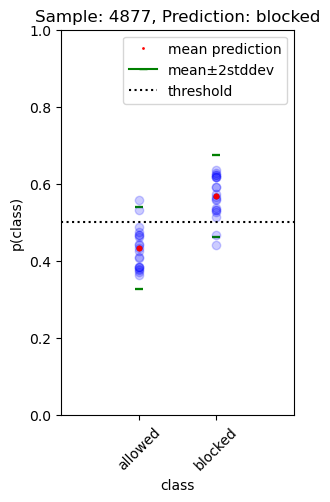

label: 0.0


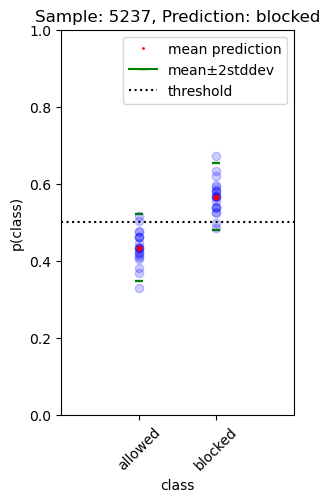

label: 0.0


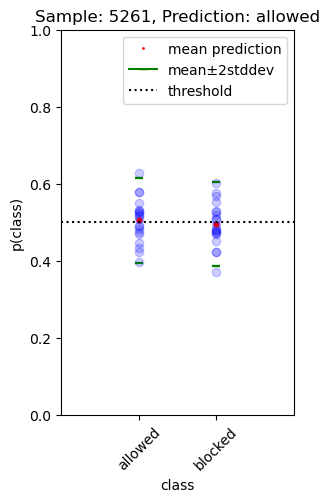

label: 0.0


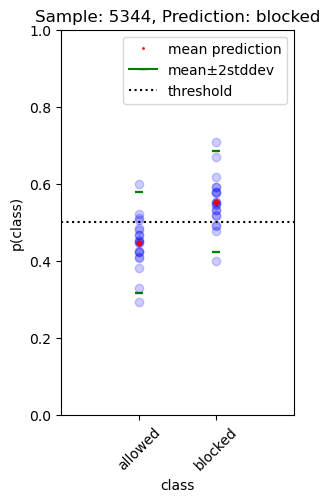

label: 0.0


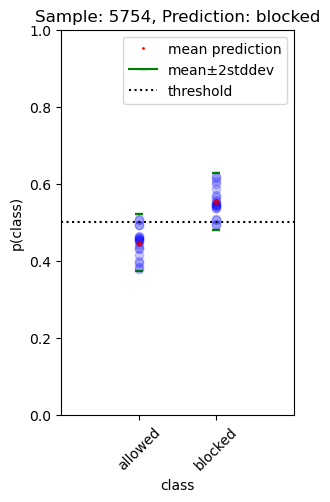

label: 0.0


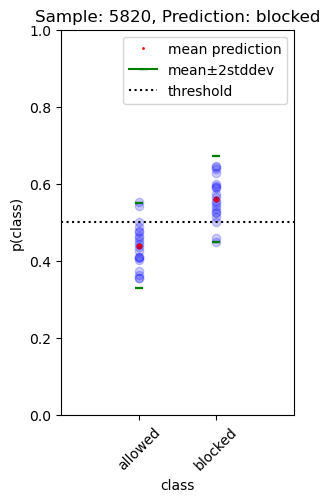

label: 0.0


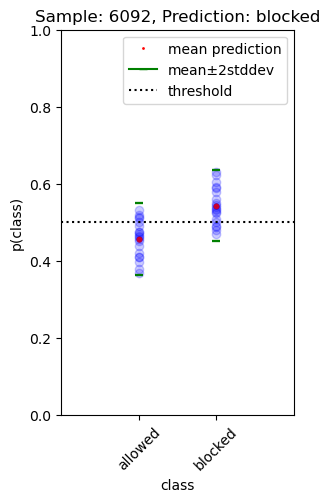

label: 0.0


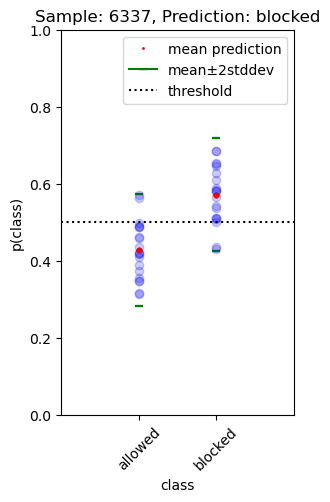

label: 0.0


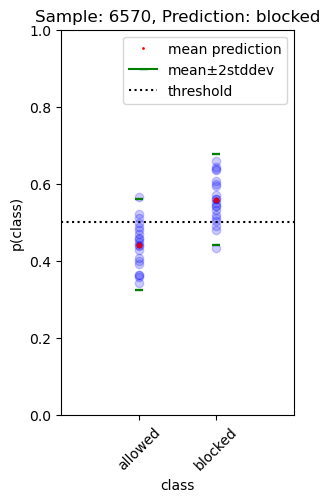

label: 0.0


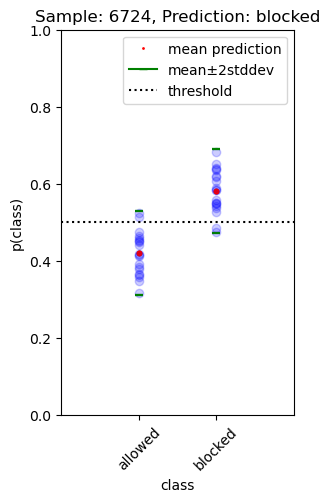

label: 0.0


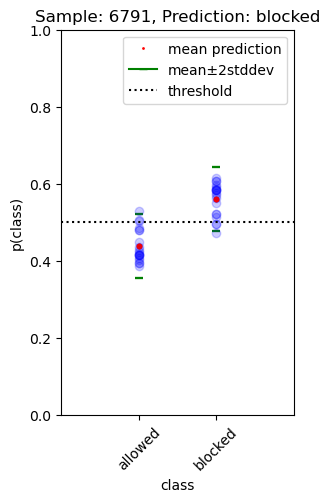

label: 0.0


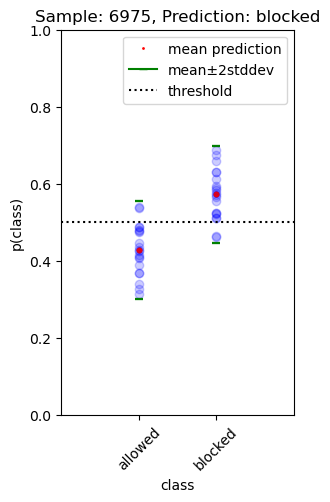

label: 0.0


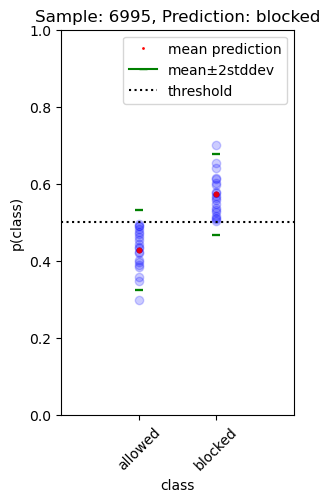

label: 0.0


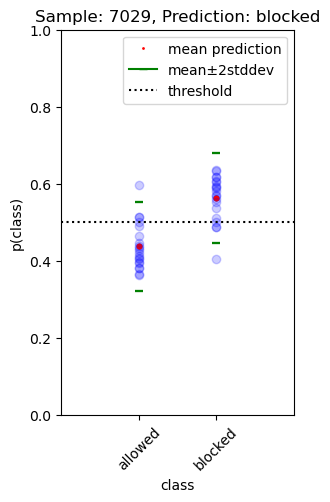

label: 0.0


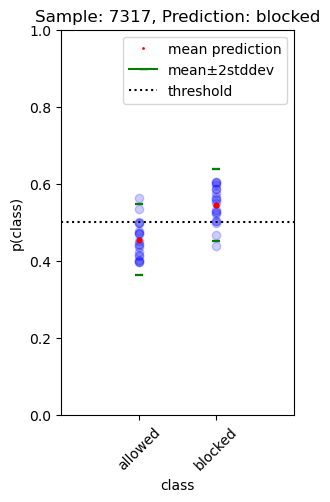

label: 0.0


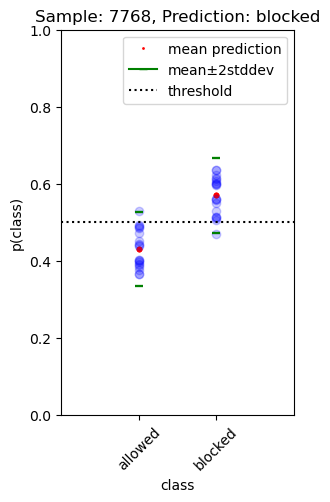

label: 0.0


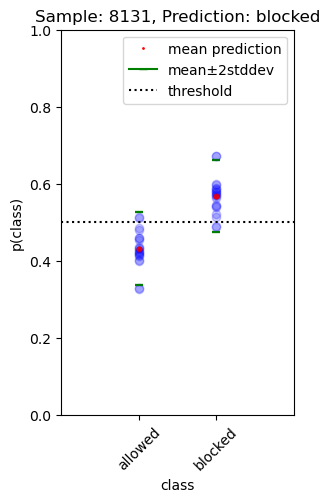

label: 0.0


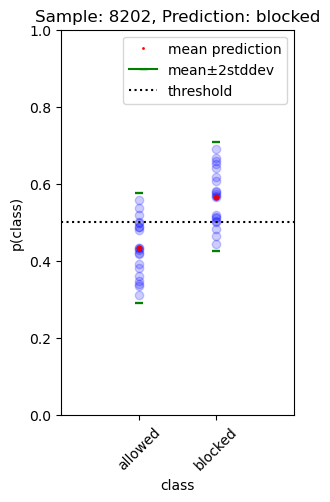

label: 0.0


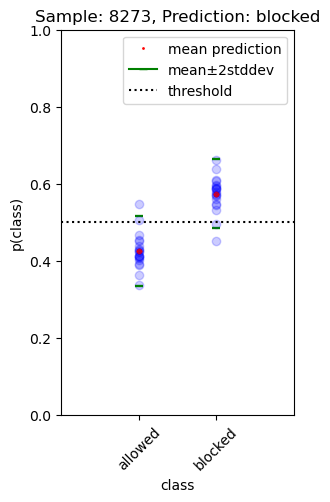

label: 0.0


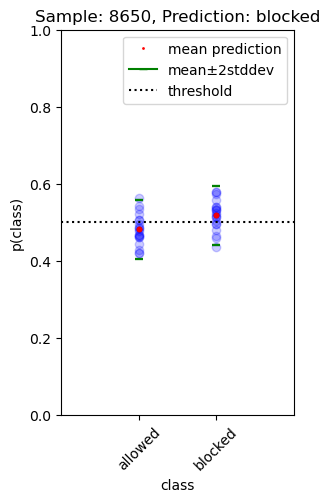

label: 0.0


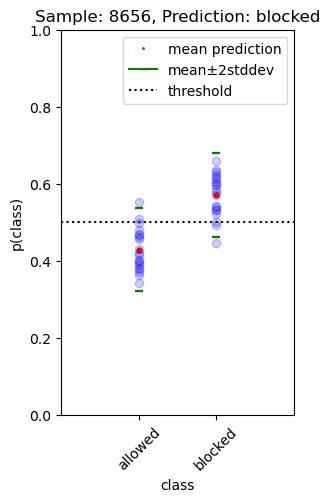

label: 0.0


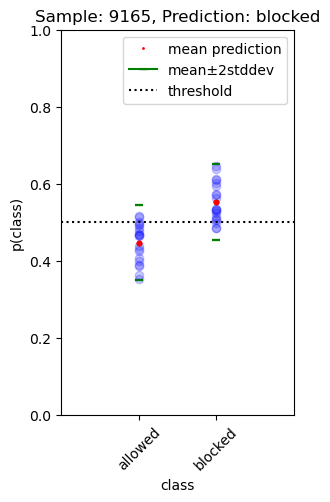

label: 0.0


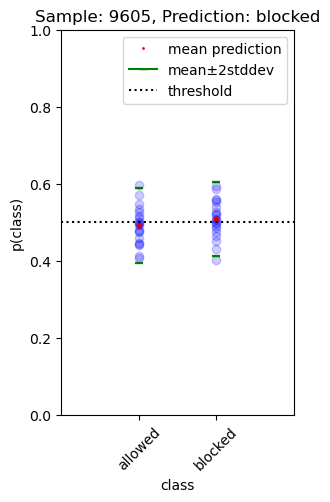

label: 0.0


In [17]:
##### mcd_thresh = 0.5276166

preds = np.mean(cd_pred, axis=0)
prediction = np.where(preds[:,1] > 0.5, 1, 0)
num = np.inf
for i in range(len(y_test)):
    test = y_test[i]
    p = prediction[i]
    if (test == 1) and (y_test[i] == prediction[i]):
        num=i
        print(num)
        plot_sample(num, cd_pred)
        print('label:',y_test[num])
        break
        

for i in range(10000):
    num = np.abs(np.mean(cd_pred[:,i,0]) - np.mean(cd_pred[:,i,1]))
    if num < 0.2 and y_test[i] == 0:
        plot_sample(i, cd_pred)
        print('label:',y_test[i])

# Inbound Traffic

In [97]:
_,_,_,_,x_test,y_test = load_data('inbound')


======== loadiing train and test data ==========
load x_train
load y_train
load x_test
load x_test
load x_val
load y_val
...load complete.
imported training data:
x_train shape: (9884082, 385)
y_train shape: (9884082,)
[(0.0, 9734288), (1.0, 149794)]
imported validation data:
x_val shape: (1354531, 385)
y_val shape: (1354531,)
[(0.0, 1333990), (1.0, 20541)]
imported test data:
x_test shape: (3583199, 385)
y_test shape: (3583199,)
[(0.0, 3518141), (1.0, 65058)]
